# Verification of Alfonso Hermida's Solution for the Deflection of a Circular Membrane under Pressure
The goal for this exploration is to check the predictions of Alfonso Hermida's equations for the deformation of a circular membrane against the experimental inflatable mirror work done by the Center for Aerospace Structures at the University of Colorado, Boulder. See the end of this document for all sources. First, import required modules:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

### Defining Experimental Parameters
Young's modulus for 0.0005 in thick kapton is 543000 psi. The material has a poisson's ratio of 0.3, with a diameter of 1 m (39.3701 in) and is stressed to 50 psi before applying differential pressure:

In [64]:
h = 0.0005 # (in) membrane thickness
E = 543000 # (psi) young's modulus
v = 0.3 # poisson's ratio
a = 39.3701/2 # (in) radius of the mirror
p = 50 * 2*a*np.pi * h # (lb) preload force
alpha_cubed_num = 6615*(v**2 - 1)
alpha_cubed_denom = 2*(2791*v**2 - 4250*v - 7505)
alpha_cubed = alpha_cubed_num/alpha_cubed_denom

### Modeling Mirror Deflection with Hermida's Equations
The following function returns Hermida's transverse displacement function for a specific case of differential pressure $q$ of the form:

$$w = w_{0} \left [ 1 - \left ( \frac{r}{a} \right ) ^{2} \right ] ^{2}$$

where $w_{0}$ is the maximum transverse displacement of the membrane found from solving the following equation:

$$\pi Eh w_{0}^{3} + 2a \alpha^{3} p w_{0} - \pi a^{4} \alpha^{3} q = 0$$

and $r$ is radial position along the mirror.

In [65]:
def transverse_deflection(q):
    
    # Solve for w_0:
    w_0 = fsolve(lambda w_0: np.pi*E*h*w_0**3 + 2*a*alpha_cubed*p*w_0 - np.pi*(a**4)*alpha_cubed*q, 0)
    
    # return a function for membrane deflection with respect to radial position:
    return lambda r: w_0*(1 - (r/a)**2)**2

The Center for Aerospace Structures tested two kapton mirrors with inflation pressures of 0.030 and 0.0025 psi. `transverse_deflection(q)` is used to find their deflection functions:

In [66]:
# For the case with inflation pressure 0.03 psi:
q_1 = 0.03
deflect_func_1 = transverse_deflection(q_1)

# For the case with inflation pressure 0.0025 psi:
q_2 = 0.0025
deflect_func_2 = transverse_deflection(q_2)

Now these deflection functions are evaluated over the range of radii of the mirror to calculate the mirror's predicted shape according to Hermida:

In [67]:
r = np.linspace(0, a, 100)
w_1 = deflect_func_1(r)
w_2 = deflect_func_2(r)

### Comparing the Model to Experimental Data
And finally, these predictions are compared to the experimental results:

<IPython.core.display.Javascript object>


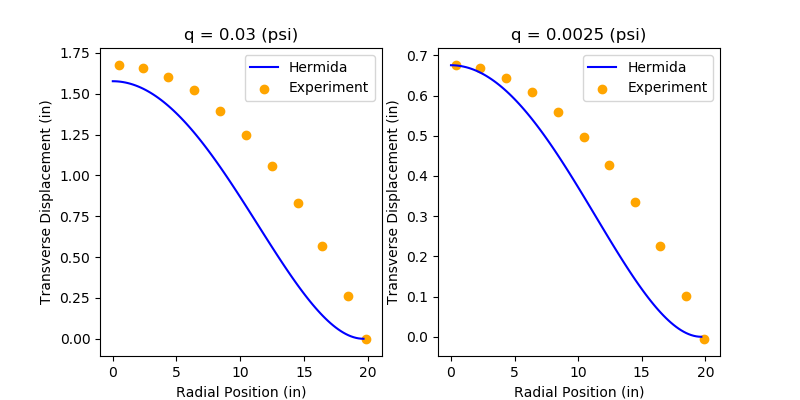

In [74]:
# Load experimental data:
exp_1 = np.loadtxt('raw-data/kapton-displacement-vs-radius/0.03-psi.csv', delimiter=',')
r_exp_1 = exp_1[:, 0]
w_exp_1 = exp_1[:, 1]
exp_2 = np.loadtxt('raw-data/kapton-displacement-vs-radius/0.0025-psi.csv', delimiter=',')
r_exp_2 = exp_2[:, 0]
w_exp_2 = exp_2[:, 1]

# Set up plots:
%matplotlib notebook
fig, [ax_1, ax_2] = plt.subplots(nrows=1, ncols=2, figsize=[8, 4])

# Plot the case for 0.03 psi:
ax_1.set_title('q = 0.03 (psi)')
ax_1.set_xlabel('Radial Position (in)')
ax_1.set_ylabel('Transverse Displacement (in)')
ax_1.plot(r, w_1, color='blue', linestyle='-', label='Hermida')
ax_1.scatter(r_exp_1, w_exp_1, color='orange', marker='o', label='Experiment')
ax_1.legend()

# Plot the case for 0.0025 psi:
ax_2.set_title('q = 0.0025 (psi)')
ax_2.set_xlabel('Radial Position (in)')
ax_2.set_ylabel('Transverse Displacement (in)')
ax_2.plot(r, w_2, color='blue', linestyle='-', label='Hermida')
ax_2.scatter(r_exp_2, w_exp_2, color='orange', marker='o', label='Experiment')
ax_2.legend()

### Conclusion
The predictions from Hermida's equations do not match the Center for Aerospace Structure's experimental data. A more accurate model is required before the feasibility of an amateur-grade membrane telescope mirror can be evaluated.

### Sources


Hermida, A. (1999). Deflection of stretched circular membrane under pressure. NASA Tech Briefs, 23(9), 50. Retrieved from http://ezproxy.lib.utah.edu/docview/223377471?accountid=14677



Palisoc, A., Veal, G., Cassapakis, C., Greschik, G., & Mikulas, M. (2006). Geometry attained by pressurized membranes. Star, 44(25) Retrieved from http://ezproxy.lib.utah.edu/docview/23944248?accountid=14677

